In [2]:
import pandas as pd
df = pd.read_csv('smsspamcollection/SMSSpamCollection',
                 sep="\t",
                   header=None, 
                   names=['label', 'sms_message'])

# Output printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Check the shape of the dataset
df.shape

(5572, 2)

In [4]:
#Check if any null values are present in the dataset
df.isnull().sum()

label          0
sms_message    0
dtype: int64

In [5]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Mapping of the categorical fields 0 to address and 
df['label'] = df.label.map({'spam':0, 'ham':1})
df.head() # returns (rows, columns)

,label,sms_message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [8]:
# Instantiate the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
predictions = naive_bayes.predict(testing_data)

In [11]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
print(classification_report(y_test,predictions))

Accuracy score:  0.9885139985642498
Precision score:  0.9909390444810544
Recall score:  0.9958609271523179
F1 score:  0.9933938893476465
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       185
           1       0.99      1.00      0.99      1208

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [12]:
from sklearn.naive_bayes import GaussianNB
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(training_data.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
predictions_gaussian = gaussian_naive_bayes.predict(testing_data.toarray())

In [14]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions_gaussian)))
print('Precision score: ', format(precision_score(y_test, predictions_gaussian)))
print('Recall score: ', format(recall_score(y_test, predictions_gaussian)))
print('F1 score: ', format(f1_score(y_test, predictions_gaussian)))
print(classification_report(y_test,predictions_gaussian))

Accuracy score:  0.8994974874371859
Precision score:  0.9899082568807339
Recall score:  0.8932119205298014
F1 score:  0.9390774586597042
              precision    recall  f1-score   support

           0       0.57      0.94      0.71       185
           1       0.99      0.89      0.94      1208

    accuracy                           0.90      1393
   macro avg       0.78      0.92      0.83      1393
weighted avg       0.93      0.90      0.91      1393



In [15]:
from sklearn.linear_model import LogisticRegression
logistics_regression = LogisticRegression()
logistics_regression.fit(training_data.toarray(), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
predictions_logistics = logistics_regression.predict(testing_data.toarray())

In [17]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions_logistics)))
print('Precision score: ', format(precision_score(y_test, predictions_logistics)))
print('Recall score: ', format(recall_score(y_test, predictions_logistics)))
print('F1 score: ', format(f1_score(y_test, predictions_logistics)))
print(classification_report(y_test,predictions_logistics))

Accuracy score:  0.9877961234745154
Precision score:  0.9869174161896974
Recall score:  0.9991721854304636
F1 score:  0.993006993006993
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       185
           1       0.99      1.00      0.99      1208

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [18]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(training_data.toarray(), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
predictions_svm = svm_model.predict(testing_data.toarray())

In [20]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions_svm)))
print('Precision score: ', format(precision_score(y_test, predictions_svm)))
print('Recall score: ', format(recall_score(y_test, predictions_svm)))
print('F1 score: ', format(f1_score(y_test, predictions_svm)))
print(classification_report(y_test,predictions_svm))

Accuracy score:  0.9849246231155779
Precision score:  0.9837000814995925
Recall score:  0.9991721854304636
F1 score:  0.9913757700205338
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       185
           1       0.98      1.00      0.99      1208

    accuracy                           0.98      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.98      0.98      1393



In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(training_data.toarray(), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
predictions_decision_tree = decision_tree.predict(testing_data.toarray())

In [23]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions_decision_tree)))
print('Precision score: ', format(precision_score(y_test, predictions_decision_tree)))
print('Recall score: ', format(recall_score(y_test, predictions_decision_tree)))
print('F1 score: ', format(f1_score(y_test, predictions_decision_tree)))
print(classification_report(y_test,predictions_decision_tree))

Accuracy score:  0.9641062455132807
Precision score:  0.9793046357615894
Recall score:  0.9793046357615894
F1 score:  0.9793046357615894
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       185
           1       0.98      0.98      0.98      1208

    accuracy                           0.96      1393
   macro avg       0.92      0.92      0.92      1393
weighted avg       0.96      0.96      0.96      1393



In [26]:
import numpy as np
import matplotlib.pyplot as plt
names = ("LR","DecisionTree","Multinomial","Gaussian","SVM")
results = [accuracy_score(y_test, predictions_logistics) * 100,accuracy_score(y_test, predictions_decision_tree)*100,
          accuracy_score(y_test, predictions)*100,accuracy_score(y_test, predictions_gaussian)*100,
          accuracy_score(y_test, predictions_svm)*100]


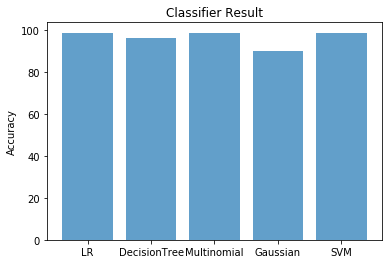

In [27]:
y_pos = np.arange(len(names))

plt.bar(y_pos, results,alpha=0.7)
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
plt.title('Classifier Result')

plt.show()

In [38]:
msg = "Your Credit card balance is 1000"
msg = [msg,]
msg = count_vector.transform(msg)
value = naive_bayes.predict(msg)
if value[0] == 0:
    print("spam")
else:
    print("ham")




spam
